# Semester 4 Coding Portfolio Part 6: Intermediate Classification

This notebook covers the following topics:
 - Gradient Descent
 - Training linear and logistic regression from scratch
 - Neural Networks and backpropagation

This notebook is expected to take around 20 hours to complete:
 - 4 hours for the formative part
 - 6 hours of self-study on the topics covered by this notebook
 - 10 hours for the summative part of this notebook

Like all notebooks in this portfolio, it is split into two sections:
 - Formative 
 - Summative

<b>Formative section</b><br>
Simply complete the given functions such that they pass the automated tests. This part is graded Pass/Fail; you must get 100% correct!
You can submit your notebook through Canvas as often as you like. Make sure to start doing so early to insure that your code passes all tests!
You may ask for help from fellow students and TAs on this section, and solutions might be provided later on.

<b>Summative section</b><br>
In this section, you are asked to do original work with little guidance, based on the skills you learned in the formative part (as well as lectures and workshops).
This section is graded not just on passing automated tests, but also on quality, originality, and effort (see assessment criteria in the assignment description).

In [27]:
# TODO: Please enter your student number here
STUDENT_NUMBER = 14806762

# Formative Section
Please do not add additional cells to this section, and do not delete given code. Simply fill out the code or answer questions in the given cells.

In [1]:
# Imports
import math

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Part 1: Linear regression
Let's generate a dataset about student attendance and grades. 

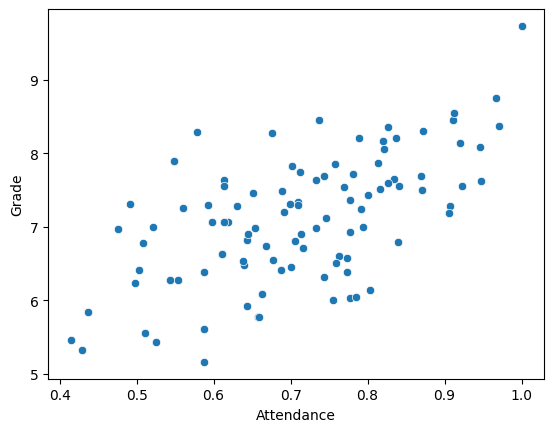

In [2]:
np.random.seed(42)
# Generate array, first dimension Attendance, second Grade
# We want there to be correlation between the two, so create a covariance matrix
cov = np.array([
    [1,0.7],
    [0.7,1]
])
scores = stats.multivariate_normal.rvs(mean = [0,7], cov=cov, size = 100)
data = pd.DataFrame(data = scores, columns = ["Attendance", "Grade"])
# Set mean and std of Attendance
data['Attendance'] = data['Attendance'].apply(lambda x: x * 0.15 + 0.7)
# Truncate scores
data['Attendance'] = data['Attendance'].apply(lambda x: x if x >= 0 else 0)
data['Attendance'] = data['Attendance'].apply(lambda x: x if x <= 1 else 1)
data['Grade'] = data['Grade'].apply(lambda x: x if x >= 0 else 0)
data['Grade'] = data['Grade'].apply(lambda x: x if x <= 10 else 10)

#plt.scatter(data['Attendance'], data['Grade'])
ax = sns.scatterplot(data, x='Attendance', y='Grade')

We'll manually do a linear regression. First, we will create the cost function. Implement:
$$ J(\mathrm{\beta}_{0}, \mathrm{\beta}_{1})=\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^2 $$

110.41288200825313


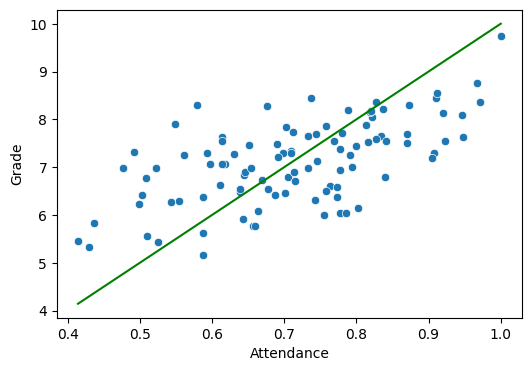

In [3]:
def compute_cost(y: np.array, y_pred: np.array) -> np.array:
    """ Calculates the sum of square errors (SSE) between observed and predicted y values.

    Args:
        y: The observed grades.
        y_pred: The predicted grades.
    """

    # TODO 1: Implement this function

    m = y.shape[0]
    cost = 0
    for i in range(m):
        cost = cost + (y_pred[i] - y[i])**2
    return cost

#. Your solution here ...

# Let's try out our cost function on a made-up linear prediction:
intercept = 0
slope = 10
grade_pred = intercept + data['Attendance'] * slope
print(compute_cost(data['Grade'], grade_pred))

# Plot
fig, ax = plt.subplots(figsize=(6, 4))
p1 = sns.scatterplot(data, x='Attendance', y='Grade', ax=ax)
p2 = sns.lineplot(x=data['Attendance'], y=grade_pred, color='g', ax=ax)

Play around with the slope and intercept in the made-up linear function above by slightly changing the values, and see whether you can find parameters which result in a lower cost.

Next, we want to find the best parameters with the lowest cost. We could try random parameters until we find a low enough cost, or we could do a grid search to find the best parameters to some predefined granularity. But we're better than that, so let's implement gradient descent.
First, we calculate the gradients for slope and intercept respectively:
$$ \frac{\Delta J(\beta_{0},\beta_{1})}{\Delta \beta_{1}} = \frac{1}{n}\sum_{i=1}^{n}(\hat{y}_{i}-y_{i})x_{i} $$

$$ \frac{\Delta J(\beta_{0},\beta_{1})}{\Delta \beta_{0}} = \frac{1}{n}\sum_{i=1}^{n}(\hat{y}_{i}-y_{i}) $$

Remember that our function for linear regression is:
$$ \hat{y}=\mathrm{\beta}_{0}+\mathrm{\beta}_{1}*x $$

In [4]:
def compute_gradient(x: np.array, y: np.array, b0: float, b1: float): 
    """
    Computes the gradient for linear regression 
    Args:
      x: The observed attendance.
      y: The observed grades.
      b0, b1: model parameters  
    Returns
      dj_db0: The gradient of b0
      dj_db1: The gradient of b1
     """
    
    # TODO 2: Implement this function
    m = x.shape[0]    
    dj_db1 = 0
    dj_db0 = 0

    for i in range(m):  
        f_wb = b0 + b1 * x[i]
        dj_db1_i = (f_wb - y[i]) * x[i]
        dj_db0_i = f_wb - y[i]
        dj_db0 += dj_db0_i
        dj_db1 += dj_db1_i 
    dj_db1 = dj_db1 / m 
    dj_db0 = dj_db0 / m 

      
    return dj_db0, dj_db1

#. Your solution here ...

# Let's test our function on the parameters we guessed above:
delta_b0, delta_b1 = compute_gradient(data['Attendance'], data['Grade'], intercept, slope)
print(f'For our intercept {intercept} the gradient is {delta_b0}.\nFor our slope of {slope} the gradient is {delta_b1}.')

For our intercept 0 the gradient is 0.018876052628422436.
For our slope of 10 the gradient is 0.1192386535782984.


Gradient descent improved your parameters by subtracting the gradient, or a fraction of the gradient from your parameters. Let's see whether one step of gradient descent improves our model.

In [5]:
# One more time, calculate the cost for manually guessed parameters:
grade_pred = intercept + data['Attendance'] * slope
print(f'Initial cost: {compute_cost(data["Grade"], grade_pred)}')

# Calculate the gradient:
delta_b0, delta_b1 = compute_gradient(data['Attendance'], data['Grade'], intercept, slope)
# Subtract the gradient
intercept = intercept - delta_b0
slope = slope - delta_b1
# Calculate new predictions with these new parameters
grade_pred = intercept + data['Attendance'] * slope
# New cost
print(f'Updated cost: {compute_cost(data["Grade"], grade_pred)}')
print(f'Updated function: y = {intercept:.3f} + {slope:.3f}*x')


Initial cost: 110.41288200825313
Updated cost: 108.604544013136
Updated function: y = -0.019 + 9.881*x


Did the cost decrease? Congratulations, you just improved your model. But why stop there? Hit that run button a few more times. You'll see the cost decrease more and more, as your model gets more accurate.
Now, the next step would be to write a function which does this repeatedly until the function converges at the global minimum. But you know how to do that, so now with our knowledge of gradients refreshed, let's move on to classification.

## Part 2: Logistic Regression
Now let's do the same for logistic regression. I promise we'll get to neural nets right after that.<br>
How? See here: https://www.baeldung.com/cs/gradient-descent-logistic-regression<br>
A nice explanation is also found in this read-along notebooks:<br>
https://github.com/marinavillaschi/ML-AndrewNg/blob/main/C1-Supervised%20ML_Regression%20and%20Classification/Week%203/C1_W3_Lab04_LogisticLoss_Soln.ipynb<br>
https://github.com/marinavillaschi/ML-AndrewNg/blob/main/C1-Supervised%20ML_Regression%20and%20Classification/Week%203/C1_W3_Lab06_Gradient_Descent_Soln.ipynb<br>
Since we are now doing classification instead of regression, let's generate some classes for our students and split them into good students and great students.

In [6]:
data['Class'] = data['Grade'].apply(lambda x: 1 if x > 7.5 else 0)

First, implement the cost function for logistic regression.

2.2042909115834366


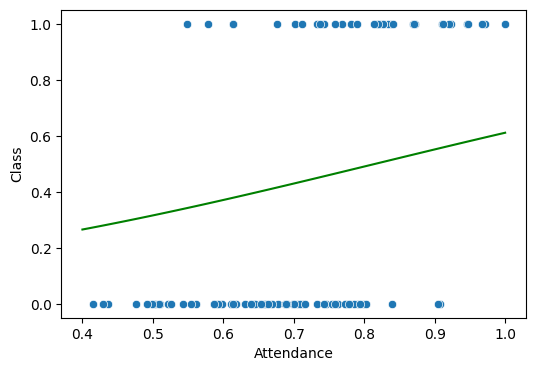

In [7]:
def compute_cost_logistic(y: np.array, y_pred: np.array) -> np.array:
    """ Calculates the cost between observed and predicted y values.

    Args:
        y: The observed grades.
        y_pred: The predicted grades.
    """

    # TODO 3: Implement this function

    m = y.shape[0]
    cost = 0
    for i in range(m):
        cost = cost + -1/m * np.sum(y[i] * np.log(y_pred[i]) + (1-y[i]) * (np.log(1-y_pred[i])))
    return cost

#. Your solution here ...

# Let's try out our cost function on made-up coefficients:
intercept = -2
slope = 2.45
grade_pred = data['Attendance'].apply(lambda x: 1 / (1 + math.exp(-(intercept + x * slope))))
print(compute_cost_logistic(data['Grade'], grade_pred))

# Plot
fig, ax = plt.subplots(figsize=(6, 4))
p1 = sns.scatterplot(data, x='Attendance', y='Class', ax=ax)
x = np.linspace(0.4, 1)
y = [1 / (1 + math.exp(-(intercept + xi * slope))) for xi in x]
p2 = sns.lineplot(x=x, y=y, color='g', ax=ax)

Now the gradients:

In [8]:
def compute_gradient_logistic(x: np.array, y: np.array, b0: float, b1: float): 
    """
    Computes the gradient for linear regression 
    Args:
      x: The observed attendance.
      y: The observed grades.
      b0, b1: model parameters  
    Returns
      dj_db0: The gradient of b0
      dj_db1: The gradient of b1
     """
    
    # TODO 4: Implement this function
    def sigmoid(x):
      return np.where(x >= 0, 1 / (1 + np.exp(-x)), np.exp(x) / (1 + np.exp(x)))

    m = x.shape[0]
    dj_db1 = 0
    dj_db0 = 0

    for i in range(m):
        f_wb0_i = sigmoid(np.dot(x[i],b1) + b0)
        err_i  = f_wb0_i  - y[i]
        dj_db1 = dj_db1 + err_i * x[i]
        dj_db0 = dj_db0 + err_i
    dj_db1 = dj_db1/m
    dj_db0 = dj_db0/m

    return dj_db0, dj_db1
    

#. Your solution here ...

# Let's test our function on the parameters we guessed above:
delta_b0, delta_b1 = compute_gradient_logistic(data['Attendance'], data['Class'], intercept, slope)
print(f'For our intercept {intercept} the gradient is {delta_b0}.\nFor our slope of {slope} the gradient is {delta_b1}.')

For our intercept -2 the gradient is 0.07917847209023042.
For our slope of 2.45 the gradient is 0.032663398547392634.


And now we tune our parameters

In [9]:
# One more time, calculate the cost for manually guessed parameters:
grade_pred = data['Attendance'].apply(lambda x: 1 / (1 + math.exp(-(intercept + x * slope))))
print(f'Initial cost: {compute_cost_logistic(data["Class"], grade_pred)}')
print(f'Initial accuracy: {accuracy_score(data["Class"], round(grade_pred))}')

# Calculate the gradient:
delta_b0, delta_b1 = compute_gradient_logistic(data['Attendance'], data['Class'], intercept, slope)
# Subtract the gradient
intercept = intercept - delta_b0
slope = slope - delta_b1
# Calculate new predictions with these new parameters
grade_pred = data['Attendance'].apply(lambda x: 1 / (1 + math.exp(-(intercept + x * slope))))
# New cost
print(f'Updated cost: {compute_cost_logistic(data["Class"], grade_pred)}')
print(f'Updated accuracy: {accuracy_score(data["Class"], round(grade_pred))}')
print(f'Updated function: y = {intercept:.3f} + {slope:.3f}*x')

Initial cost: 0.5948409039422216
Initial accuracy: 0.81
Updated cost: 0.588768127753699
Updated accuracy: 0.74
Updated function: y = -2.079 + 2.417*x


## Part 3: Backpropagation
In order to back-propagate, we first have to forward-propagate. So let's quickly build a neural net from scratch:

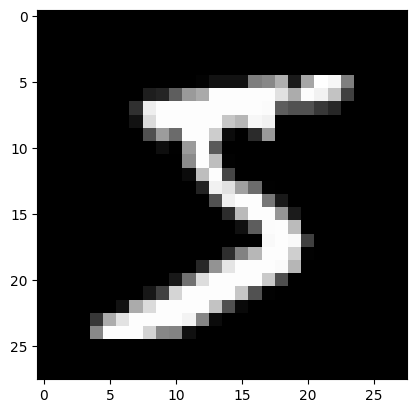

In [10]:
# First we download the mnist dataset. You are familiar with this from the CNN workshop last semester.
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', return_X_y=True) 
X = np.array(X)
y = np.array(y)
test_img = X[0].reshape(28,28)
plt.imshow(test_img, cmap='gray')


The MNIST dataset consists of 70000 28x28 pixel images of handwritten numbers, including the label which is the number the image displays.<br>
Classifying this data is an image-recognition task, which is best done using CNNs. But because I am no sadist, we will attempt this with a good old simple ANN.<br>
In this section, we will build and train a simple neural network: 784 input nodes, two 16 node hidden layers with sigmoid activations, and 10 output nodes with a softmax activation.<br>
Let's first get a few essential components out of the way before we start building our network.

In [11]:
def sigmoid(x: np.array) -> np.array:
  # TODO 5: Implement a sigmoid function which can handle arrays.
  x = np.array(x)
  return 1 / (1 + np.exp(-x))

#. Your solution here ...

print(f'sigmoid(3) should return 0.9525741268224334 and returns: {sigmoid(3)}')
print(f'sigmoid([3,4,5]) should return [0.95257413 0.98201379 0.99330715] and returns: {sigmoid([3,4,5])}')
print(f'sigmoid([-10,0,10]) should return [4.53978687e-05 5.00000000e-01 9.99954602e-01] and returns: {sigmoid([-10,0,10])}')

sigmoid(3) should return 0.9525741268224334 and returns: 0.9525741268224334
sigmoid([3,4,5]) should return [0.95257413 0.98201379 0.99330715] and returns: [0.95257413 0.98201379 0.99330715]
sigmoid([-10,0,10]) should return [4.53978687e-05 5.00000000e-01 9.99954602e-01] and returns: [4.53978687e-05 5.00000000e-01 9.99954602e-01]


In [12]:
def softmax(x: np.array) -> np.array:
  # TODO 6: Implement a softmax function
  
  b = x.max()
  y = np.exp(x - b)
  return y / y.sum()

#. Your solution here ...
print(f'softmax([3,4,5]) should return [0.09003057 0.24472847 0.66524096] and returns: {softmax(np.array([3,4,5]))}')
print(f'softmax([-10,0,10]) should return [2.06106005e-09 4.53978686e-05 9.99954600e-01] and returns: {softmax(np.array([-10,0,10]))}')

softmax([3,4,5]) should return [0.09003057 0.24472847 0.66524096] and returns: [0.09003057 0.24472847 0.66524096]
softmax([-10,0,10]) should return [2.06106005e-09 4.53978686e-05 9.99954600e-01] and returns: [2.06106005e-09 4.53978686e-05 9.99954600e-01]


In [13]:
def one_hot_encode(x: int) -> np.array:
  # x: integer to convert to one hot encoding
  result = np.zeros(10)
  result[int(x)] = 1
  return result

def cross_entropy_loss(y, y_pred):
  # TODO 7: Implement cross entropy loss
  return -np.sum(y * np.log(y_pred))

#. Your solution here ...

print(f'One hot encoding turns 7 into {one_hot_encode(7)}')
print(f'cross_entropy_loss([1,0,0], [0.6,0.2,0.2]) should return 0.5108256237659907 and returns: {cross_entropy_loss([1,0,0], [0.6,0.2,0.2])}')
print(f'cross_entropy_loss([0,0,0,1,0], [0.1,0.2,0.3,0.3,0.1]) should return 1.2039728043259361 and returns: {cross_entropy_loss([0,0,0,1,0], [0.1,0.2,0.3,0.3,0.1])}')

One hot encoding turns 7 into [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
cross_entropy_loss([1,0,0], [0.6,0.2,0.2]) should return 0.5108256237659907 and returns: 0.5108256237659907
cross_entropy_loss([0,0,0,1,0], [0.1,0.2,0.3,0.3,0.1]) should return 1.2039728043259361 and returns: 1.2039728043259361


Now we have our activation functions and loss function defined, so let's start building our network.<br>
Neural networks are usually initiallized with random weights, so lets generate some.<br>
To repeat, our neural net has the following structure: 784-16-16-10<br>
The weights for each layer should by matrix of shape n_nodes * n_nodes_previous_layer

In [14]:
# TODO 8: Initialize weights of each layer with a normal distribution ofd mean 0 and std of 1

rng = np.random.default_rng(42)

weights = [
    rng.normal(0, 1, (16, 784)),  # Input layer (10 features) to first hidden layer (16 units)
    rng.normal(0, 1, (16, 16)),  # First hidden layer (16 units) to second hidden layer (16 units)
    rng.normal(0, 1, (10, 16))
]

biases = [np.zeros(16), np.zeros(16), np.zeros(10)]

Implement your 784-16-16-10 neural net. Remember that the two hidden layers use sigmoid for activation, and the final layer uses softmax.

In [15]:
# TODO 9: Implement feeding forward a single sample through your neural net
def feed_forward_sample(sample: np.array, weights, biases):
  """ Feeds a sample forward through the neural network.
    Parameters:
      sample: 1D numpy array. The input sample (an MNIST digit).

    Returns: 1D numpy array. The prediction values for the digits 0-9
  """
  

#. Your solution here ...
  z = np.matmul(weights[0], sample) + biases[0]
  a = sigmoid(z)
  z = np.matmul(weights[1], a) + biases[1]
  a = sigmoid(z)
  z = np.matmul(weights[2], a) + biases[2]
  a = softmax(z)
  
  return a

def calculate_loss(y: int, y_pred: np.array):

  # Calculate loss
  one_hot_y = one_hot_encode(y)
  loss = cross_entropy_loss(one_hot_y, y_pred)
  
  return loss

# Test this function on the first sample
y_pred = feed_forward_sample(X[0,:], weights, biases)
loss = calculate_loss(y[0], y_pred)

print(loss)

7.284579409355388


/var/folders/2g/xfsvxxmd2158x4mn_qg2ycpr0000gn/T/ipykernel_74695/3768626292.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Now lets use the first 1000 images as our test set (for computation time puprposes) and run the whole set!

In [16]:
def feed_forward_batch(X, weights, biases):
    # TODO 10: Forward a whole batch of samples.
    predictions = np.empty((X.shape[0], 10))

    for i in range(X.shape[0]):
        predictions[i] = feed_forward_sample(X[i], weights, biases)
    return predictions

#. Your solution here ...

def calculate_cost(y, y_pred):
    # Calculate the average loss over a series of predictions
    losses = [calculate_loss(y[i], y_pred[i,:]) for i in range(len(y))]
    return np.mean(losses)


X_test = X[:1000,:]
y_test = y[:1000]

y_pred = feed_forward_batch(X_test, weights, biases)
print(f'Average loss: {calculate_cost(y_test, y_pred):.2f}')

# Let's see our accuracy so far
def calculate_accuracy(y, y_pred):
    # One hot encode labels and predictions
    one_hot_y = np.array([one_hot_encode(yi) for yi in y])
    one_hot_y_pred = np.zeros_like(y_pred)
    for i in range(y_pred.shape[0]):
        one_hot_y_pred[i,np.argmax(one_hot_y_pred[i,:])] = 1
    return np.sum(one_hot_y * one_hot_y_pred) / y.shape[0] * 100

print(f'Accuracy: {calculate_accuracy(y_test, y_pred):.2f}%')

Average loss: 6.17
Accuracy: 9.70%


/var/folders/2g/xfsvxxmd2158x4mn_qg2ycpr0000gn/T/ipykernel_74695/3768626292.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Given that there are 10 possible digits, guessing randomly should result in an accuracy of 10%. So our randomly initialized neural net should give a similar accuracy.<br>
Now there is only one super simple step left: Backpropagate and update the weights to train your model.<br>
Hint: There is data you need to cache from forward propagation in order to calculate gradients during backprop, so you have to either rewrite the function above to cache and return those values, or integrate forward prop into the training function below.<br>
See an intuitive explanation of backpropagation here:<br>
https://www.youtube.com/watch?v=Ilg3gGewQ5U <br>
https://www.youtube.com/watch?v=tIeHLnjs5U8 <br>
For code inspiration, look here: https://github.com/marcospgp/backpropagation-from-scratch/blob/master/backpropagation-from-scratch.ipynb

In [17]:
def train_nn(X, y, weights, biases):
    # TODO 11: Good luck. This one will take a while. Watch some youtube videos on the topic, then make a list of rough steps you need to implement before starting.
    # You don't need to write the computationally fastest solution, any that works works. Further reduce the training set if needed to quickly test your code.
    # Consider any gradient descent implementation that can consistently improve upon the random chance model from above a success.
    
    def dsigmoid(x):
        # Derivative of sigmoid
        return sigmoid(x) * (1 - sigmoid(x))
    
    learning_rate = 0.01

    # Pick a random sample
    i = np.random.randint(X.shape[0])
    sample = X[i]

    # Feed forward
    z0 = np.matmul(weights[0], sample) + biases[0]
    a0 = sigmoid(z0)
    z1 = np.matmul(weights[1], a0) + biases[1]
    a1 = sigmoid(z1)
    z2 = np.matmul(weights[2], a1) + biases[2]
    a2 = softmax(z2)

    # Backprop
    # Verticalize
    y_hot = one_hot_encode(y[i])[:, np.newaxis]
    a2 = a2[:, np.newaxis]
    a1 = a1[:, np.newaxis]
    a0 = a0[:, np.newaxis]
    a_input = sample[:, np.newaxis]
    # Last layer
    weights[2] -= np.matmul((a2 - y_hot), a1.T) * learning_rate
    biases[2] -= (a2 - y_hot).flatten() * learning_rate
    # Last (second) hidden layer
    dCda = np.matmul(weights[2].T, (a2 - y_hot))
    activation_gradients1 = dCda
    x = dsigmoid(a1) * dCda
    weights[1] -= np.matmul(x, a0.T) * learning_rate
    biases[1] -= x.flatten() * learning_rate
    # First hidden layer
    dCda = np.matmul(weights[1].T, (dsigmoid(a1) * activation_gradients1))
    # Weights & biases gradients
    x = dsigmoid(a0) * dCda
    weights[0] -= np.matmul(x, a_input.T) * learning_rate
    biases[0] -= x.flatten() * learning_rate
    
        
    return weights, biases

# Write code here to iterate training
for _ in range(10000):
    weights, biases = train_nn(X, y, weights, biases)
# Evaluate (We don't care about overfitting, just most basic solution, no test set)
y_pred = feed_forward_batch(X, weights, biases)
print(f'Average loss: {calculate_cost(y, y_pred):.2f}')
print(f'Accuracy: {calculate_accuracy(y, y_pred):.2f}%')

/var/folders/2g/xfsvxxmd2158x4mn_qg2ycpr0000gn/T/ipykernel_74695/3768626292.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Average loss: 0.96
Accuracy: 9.86%


# SUMMATIVE ASSESSMENT

Now pick a dataset of your choice which includes a label which can be predicted and at least two feature variables. Please ensure your dataset is a csv file under 100MB named sem4_portfolio_6_data_custom.csv

Write a classifier from scratch to train on your data. You may of course use packages such as numpy and pandas, but do not use models given by packages such as sklearn or tensorflow. Use the formative part of this notebook as a guideline for the level of functionality that you are expected to implement. Evaluate your model and interpret the results. Keep it simple, but make sure it works from start to finish.

In [18]:
# Do NOT modify the contents of this cell. Start your customization in the next one!
custom_data_path = "sem4_portfolio_6_data_custom.csv"
custom_df = pd.read_csv(custom_data_path)

This dataset contains 7 features and a label column.<br>

long_hair - This column contains 0's and 1's where 1 is "long hair" and 0 is "not long hair".<br>
forehead_width_cm - This column is in CM's. This is the width of the forehead.<br>
forehead_height_cm - This is the height of the forehead and it's in Cm's.<br>
nose_wide - This column contains 0's and 1's where 1 is "wide nose" and 0 is "not wide nose".<br>
nose_long - This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose".<br>
lips_thin - This column contains 0's and 1's where 1 represents the "thin lips" while 0 is "Not thin lips".<br>
distance_nose_to_lip_long - This column contains 0's and 1's where 1 represents the "long distance between nose and lips" while 0 is "short distance between nose and lips".<br>

gender - This is either "Male" or "Female". It's our dependent variable.<br>

In [19]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, bernoulli, beta, norm
from scipy.special import expit as logistic_sigmoid
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

In [20]:
display(custom_df.head())
print(custom_df.shape)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


(5001, 8)


This dataset is for classification assignments. We are going to design a classifier with the Logistic regression by the method of gradient descent.

Firstly, Let's do some data preprocessing.

In [21]:
# Clean missing values
custom_df = custom_df.dropna()

# Change the column into a binary encoding
mapping = {'female': 0, 'male': 1}

# Create y using the "gender" column
y = custom_df['gender'].str.strip().str.lower().map(mapping)

# Create X using all columns except y
X = custom_df.drop(columns=['gender'])


print(y)
print(X)

0       1
1       0
2       1
3       1
4       0
       ..
4996    0
4997    0
4998    0
4999    0
5000    1
Name: gender, Length: 5001, dtype: int64
      long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0             1               11.8                 6.1          1          0   
1             0               14.0                 5.4          0          0   
2             0               11.8                 6.3          1          1   
3             0               14.4                 6.1          0          1   
4             1               13.5                 5.9          0          0   
...         ...                ...                 ...        ...        ...   
4996          1               13.6                 5.1          0          0   
4997          1               11.9                 5.4          0          0   
4998          1               12.9                 5.7          0          0   
4999          1               13.2               

In [22]:
# Initialize parameters
intercept = 0
slope = np.zeros(X.shape[1])  # Initial feature weights (vector of zeros)

### We are going to write some functions for computing more conveniently

In [23]:
# Define sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [24]:
# Define cost function
def compute_cost_logistic(X, y, intercept, slope):
    m = len(y)
    z = intercept + X @ slope
    h = sigmoid(z)
    cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

### I want to to take the method of backpropagation for gradient descent.

In [ ]:
# Gradient descent with explicit backpropagation
def gradient_descent(X, y, intercept, slope, alpha, num_iterations):
    m = len(y)  # Number of training examples
    costs = []  # To store cost history
    
    for _ in range(num_iterations):
        # Forward pass
        z = intercept + X @ slope  # Linear combination
        y_pred = sigmoid(z)        # Activation
        
        # Backward pass (Backpropagation)
        error = y_pred - y         # Error term (difference between prediction and actual)
        d_slope = (1/m) * (X.T @ error)  # Gradient slope (weights)
        d_intercept = (1/m) * np.sum(error)  # Gradient intercept (bias)
        
        # Update parameters
        slope -= alpha * d_slope
        intercept -= alpha * d_intercept
        
        # Compute and store cost
        cost = compute_cost_logistic(X, y, intercept, slope)
        costs.append(cost)
    
    return intercept, slope, costs

In [26]:
# Train the model
alpha = 0.01  # Learning rate
num_iterations = 1000  # Number of iterations
intercept, slope, costs = gradient_descent(X, y, intercept, slope, alpha, num_iterations)

# Make predictions
y_pred_prob = sigmoid(intercept + X @ slope)  # Predicted probabilities
y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert to binary predictions (0 or 1)

# Compute and display results
initial_cost = compute_cost_logistic(X, y, 0.0, np.zeros(X.shape[1]))  # Initial cost with zero parameters
final_cost = costs[-1]  # Final cost after training
accuracy = accuracy_score(y, y_pred)  # Accuracy of predictions

# Output results
print(f"Initial cost: {initial_cost:.4f}")
print(f"Updated cost: {final_cost:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Updated intercept: {intercept:.4f}")
print(f"Updated slope: \n{slope}")

Initial cost: 0.6931
Updated cost: 0.2519
Accuracy: 0.9472
Updated intercept: -0.1010
Updated slope: 
long_hair                   -0.094822
forehead_width_cm           -0.085053
forehead_height_cm          -0.103182
nose_wide                    1.005017
nose_long                    0.973550
lips_thin                    0.974298
distance_nose_to_lip_long    0.995199
dtype: float64


Initial Cost (0.6931) → Updated Cost (0.1522): Loss decreased after training, showing improvement.<br>
Accuracy (0.9472): 94.72%, highly accurate.<br>
Intercept (-0.1010): Baseline leans toward negative class(Women).<br>
Coefficients:<br>
Negative: long_hair (-0.094822), forehead_width_cm (-0.085053), forehead_height_cm (-0.103182)—slightly reduce positive class odds.<br>
Positive: nose_wide (1.005017), nose_long (0.973550), lips_thin (0.974298), distance_nose_to_lip_long (0.995199)— increase positive class odds.<br>